#                                      Black Friday Sales Prediction 

<img src= 'https://upload.wikimedia.org/wikipedia/commons/7/7d/DCUSA.Gallery11.BB%26BBlackFriday.Wikipedia.jpg' width = 500 height = 500>

Black Friday is an informal name for the Friday following Thanksgiving Day in the United States, which is celebrated on the fourth Thursday of November. The day after Thanksgiving has been regarded as the beginning of the United States Christmas shopping season since 1952. Many stores offer highly promoted sales on Black Friday and open very early, such as at midnight, or may even start their sales at some time on Thanksgiving.Black Friday has routinely been the busiest shopping day of the year in the United States since 2005. 
By this project I have tried to understand behaviour of customers throught the data.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv('train.csv')

# Dataset

* The dataset here is a sample of the transactions made in a retail store.
* The store wants to know better the customer purchase behaviour against different products.
* Specifically, here the problem is a regression problem where we are trying to predict the dependent variable (the amount of purchase) with the help of the information contained in the other variables.

In [3]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


> We can see that there are two features (Product_Category_2 & Product_Category_3) which have missing values, we need to fill them before performing any operations.

In [5]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


* Filling the missing values using mean values.

In [6]:
imputer = SimpleImputer(missing_values = np.nan, strategy = 'mean')
imputer = imputer.fit(df.iloc[:, 9:11].values)
df.iloc[:, 9:11] = imputer.transform(df.iloc[:, 9:11].values)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          550068 non-null  float64
 10  Product_Category_3          550068 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


* Dropping the columns that intuitiey should not imapact the purchase outcome, i.e. User_ID and Product ID.

In [8]:
df.drop(['User_ID', 'Product_ID'], axis = 1, inplace = True)

* There are some special characters, like (+) in the columns 'Age' and 'stay in Current City_Years, which need to be removed, before machine learning algorithms

In [9]:
df['Age'] = df['Age'].str.strip('+')
df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].str.strip('+').astype('float')

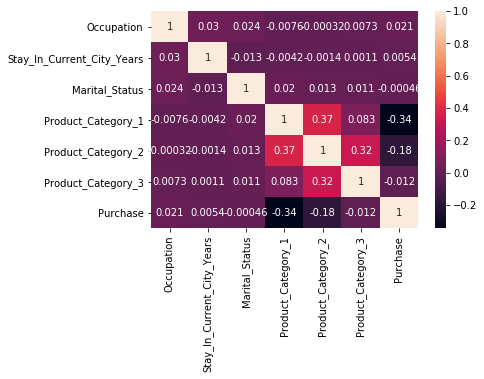

In [10]:
sns.heatmap(
    df.corr(),
    annot=True
)

plt.show()

> From the corelation coefficient matrix it can be easily seen that Purchase have positive corelation with Occupation and Stay_In_Current_City_Years.

C:\Users\Aayush\Anaconda3\lib\site-packages\seaborn\axisgrid.py:728: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


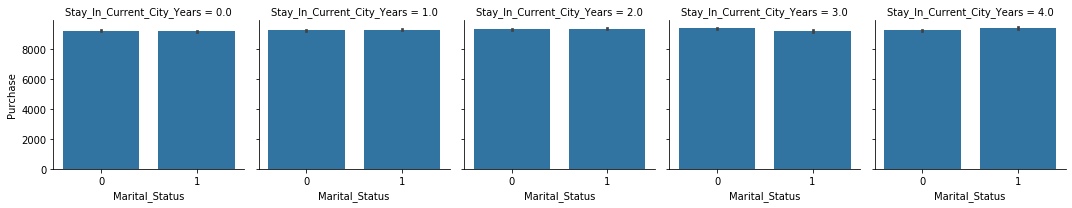

In [11]:
g = sns.FacetGrid(df, col = 'Stay_In_Current_City_Years')
g.map(sns.barplot, "Marital_Status", "Purchase")
plt.show()

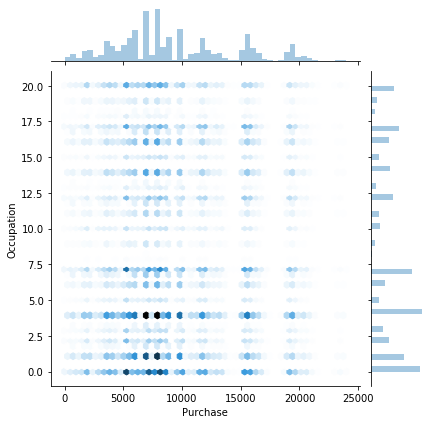

In [12]:
sns.jointplot(x = 'Purchase', y = 'Occupation', data = df, kind = 'hex')
plt.show()

> It can be seen clearly from the plot that most of the purchase is done between 5000 to 10000.
> Occupation 4, 0 and 7 are the occupations which lead to highest purchase.

C:\Users\Aayush\Anaconda3\lib\site-packages\seaborn\axisgrid.py:728: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


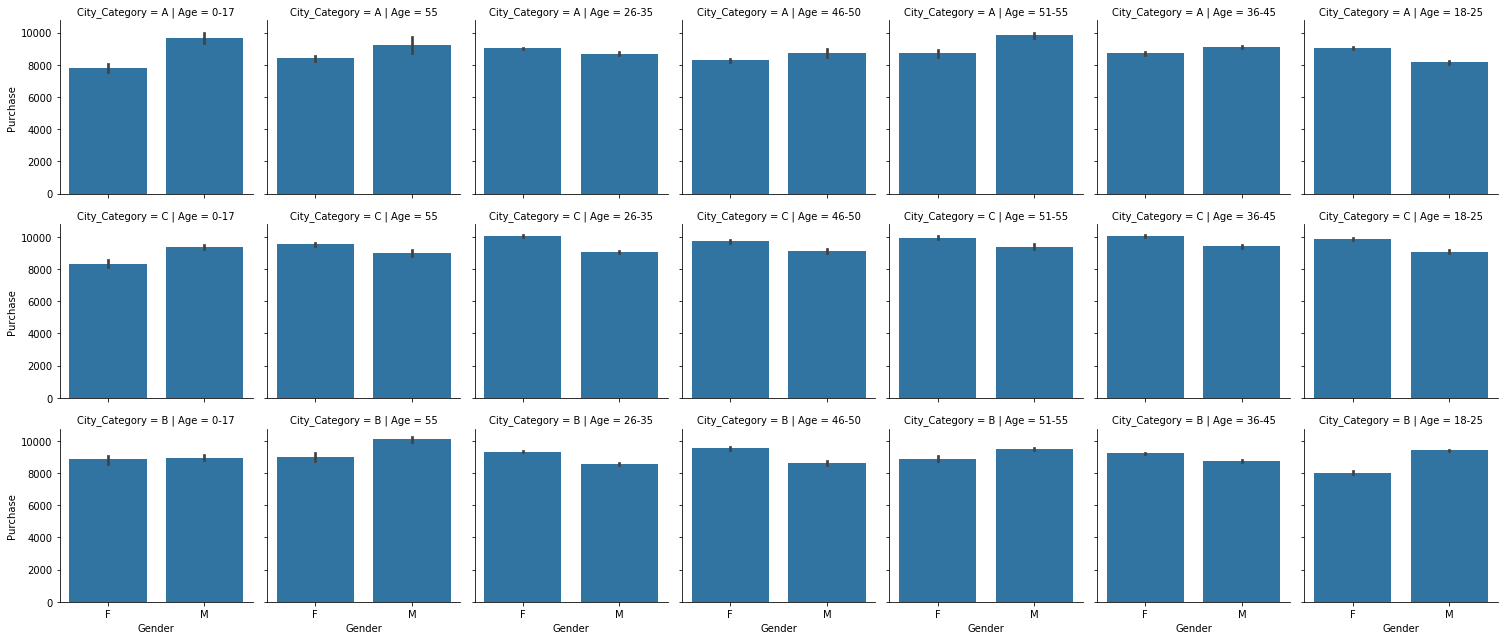

In [13]:
g = sns.FacetGrid(df, col = 'Age', row = 'City_Category')
g.map(sns.barplot, 'Gender', 'Purchase')
plt.show()

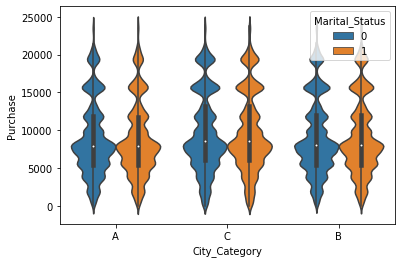

In [14]:
sns.violinplot(x = 'City_Category', 
               y = 'Purchase', hue = 'Marital_Status',
               data = df
              )
plt.show()

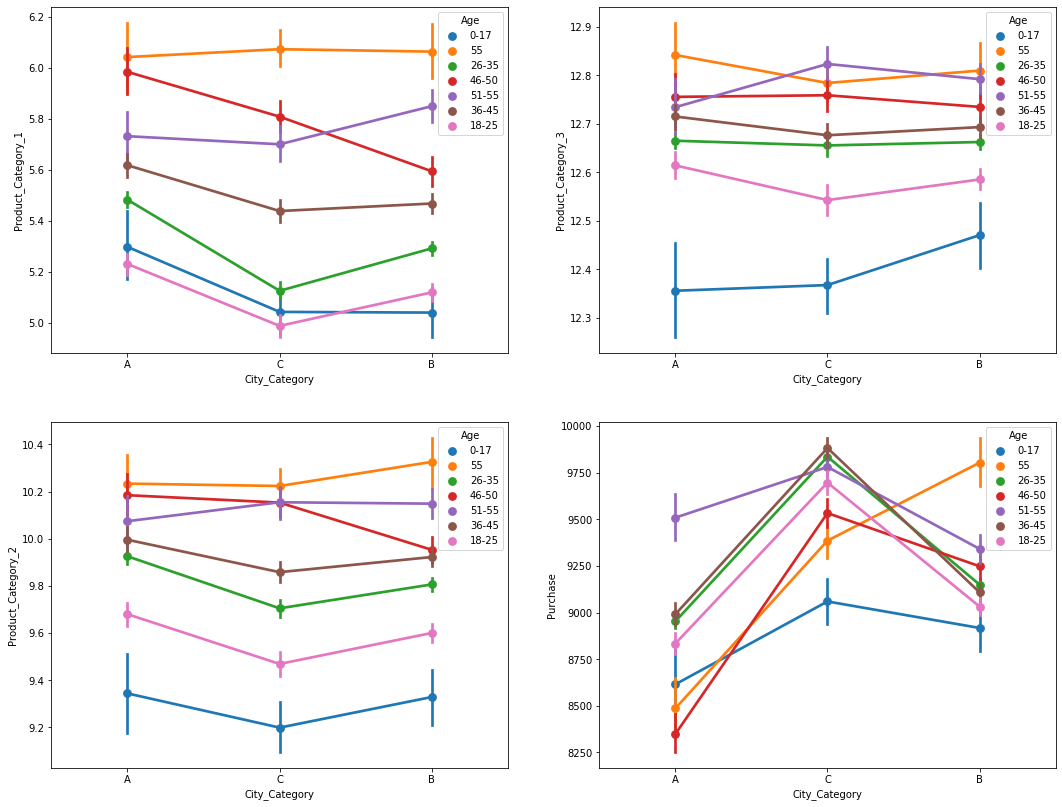

In [15]:
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (18, 14))

ax = sns.pointplot(y = 'Product_Category_1', x = 'City_Category', hue = 'Age', data = df, ax = axes[0, 0])

ax = sns.pointplot(y = 'Product_Category_2', x = 'City_Category', hue = 'Age', data = df, ax = axes[1, 0])

ax = sns.pointplot(y = 'Product_Category_3', x = 'City_Category', hue = 'Age', data = df, ax = axes[0, 1])

ax = sns.pointplot(y = 'Purchase', x = 'City_Category', hue = 'Age', data = df, ax = axes[1, 1])

plt.show()

## Now the next part of our project is prediction of sales.

* Data for which we want to predict the value of purchase.

In [16]:
df_test = pd.read_csv('test.csv')
df_test.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


Importing the missing values using the mean value.

In [17]:
imputer = SimpleImputer(missing_values = np.nan, strategy = 'mean')
imputer = imputer.fit(df_test.iloc[:, 9:11].values)
df_test.iloc[:, 9:11] = imputer.transform(df_test.iloc[:, 9:11].values)

In [18]:
df_test['Age'] = df_test['Age'].str.strip('+')
df_test['Stay_In_Current_City_Years'] = df_test['Stay_In_Current_City_Years'].str.strip('+').astype('float')

In [19]:
df_test.drop(['User_ID', 'Product_ID'], inplace = True, axis = 1)

In [20]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233599 entries, 0 to 233598
Data columns (total 9 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Gender                      233599 non-null  object 
 1   Age                         233599 non-null  object 
 2   Occupation                  233599 non-null  int64  
 3   City_Category               233599 non-null  object 
 4   Stay_In_Current_City_Years  233599 non-null  float64
 5   Marital_Status              233599 non-null  int64  
 6   Product_Category_1          233599 non-null  int64  
 7   Product_Category_2          233599 non-null  float64
 8   Product_Category_3          233599 non-null  float64
dtypes: float64(3), int64(3), object(3)
memory usage: 16.0+ MB


In [21]:
y = np.array(df['Purchase'])
df.drop(['Purchase'], inplace = True, axis = 1)

In [22]:
X_train = df.values

In [23]:
X_test = df_test.values

In [24]:
label_encoder_train = LabelEncoder()

* For X_train and X_test, there are categorical variables, which need to be encoded before they can be incorporated into the data model. We will convert each of the variable and cross check our results.

In [25]:
X_train[:, 0] = label_encoder_train.fit_transform(X_train[:, 0])
X_train[:, 1] = label_encoder_train.fit_transform(X_train[:, 1])
X_train[:, 3] = label_encoder_train.fit_transform(X_train[:, 3])

X_test[:, 0] = label_encoder_train.fit_transform(X_test[:, 0])
X_test[:, 1] = label_encoder_train.fit_transform(X_test[:, 1])
X_test[:, 3] = label_encoder_train.fit_transform(X_test[:, 3])

In [26]:
X_train

array([[0, 0, 10, ..., 3, 9.842329251122386, 12.668243206790512],
       [0, 0, 10, ..., 1, 6.0, 14.0],
       [0, 0, 10, ..., 12, 9.842329251122386, 12.668243206790512],
       ...,
       [0, 2, 15, ..., 20, 9.842329251122386, 12.668243206790512],
       [0, 6, 1, ..., 20, 9.842329251122386, 12.668243206790512],
       [0, 4, 0, ..., 20, 9.842329251122386, 12.668243206790512]],
      dtype=object)

In [27]:
X_test

array([[1, 4, 7, ..., 1, 11.0, 12.669453946534905],
       [1, 2, 17, ..., 3, 5.0, 12.669453946534905],
       [0, 3, 1, ..., 5, 14.0, 12.669453946534905],
       ...,
       [0, 2, 15, ..., 1, 5.0, 12.0],
       [0, 4, 1, ..., 10, 16.0, 12.669453946534905],
       [0, 4, 0, ..., 4, 5.0, 12.669453946534905]], dtype=object)

In [28]:
sc_X_train = StandardScaler()
X_train = sc_X_train.fit_transform(X_train)

In [29]:
x_train, x_test, y_train, y_test = train_test_split(X_train, y, test_size = 0.2, random_state = 0)

In [30]:
X_test = sc_X_train.fit_transform(X_test)

In [31]:
def get_MAE(X_train, y_train, X_test, y_test, leaf_nodes):
    model = RandomForestRegressor(max_leaf_nodes = leaf_nodes, random_state = 0)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return mean_absolute_error(y_test, y_pred)

In [32]:
leaf_node = [5, 50, 100, 300, 500, 700, 800, 900, 1000]
for i in leaf_node:
    print("Leaf Nodes = "+str(i)+"            MAE = "+str(get_MAE(x_train, y_train, x_test, y_test, i)))

Leaf Nodes = 5            MAE = 2824.959077118801
Leaf Nodes = 50            MAE = 2243.6017149377344
Leaf Nodes = 100            MAE = 2217.9453026883234
Leaf Nodes = 300            MAE = 2196.8070646633955
Leaf Nodes = 500            MAE = 2190.857143279785
Leaf Nodes = 700            MAE = 2186.6870968975386
Leaf Nodes = 800            MAE = 2185.044694034163
Leaf Nodes = 900            MAE = 2183.6119771974722
Leaf Nodes = 1000            MAE = 2182.2176106811116


* Fitting the model with best value of leaf_node, to avoid overfitting and underfitting.

In [33]:
leaf_node = 700
model = RandomForestRegressor(max_leaf_nodes = leaf_node, random_state = 0)
model.fit(X_train, y)
print("MAE: "+ str(mean_absolute_error(y, model.predict(X_train))))
y_pred = model.predict(X_test)

MAE: 2169.085560958942


## Final Predictions 

In [34]:
y_pred

array([14248.98098702, 10757.75020944,  6084.60988615, ...,
       13348.23290303, 19982.41507769,  2098.76409328])